# HW1: Linear Regression

(Cập nhật lần cuối: 26/01/2024)

Họ tên: Dương Trường Bình

MSSV: 21127229

---

## Nắm cách làm bài và nộp bài

&#9889; Bạn lưu ý là mình sẽ dùng chương trình hỗ trợ chấm bài nên bạn cần phải tuân thủ chính xác qui định mà mình đặt ra, nếu không rõ thì hỏi, chứ không nên tự tiện làm theo ý của cá nhân.

**Cách làm bài**

Bạn sẽ làm trực tiếp trên file notebook này. Đầu tiên, bạn điền họ tên và MSSV vào phần đầu file ở bên trên. Trong file, bạn làm bài ở những chỗ có ghi là:
```python
# YOUR CODE HERE
raise NotImplementedError()
```
hoặc đối với những phần code không bắt buộc thì là:
```python
# YOUR CODE HERE (OPTION)
```
hoặc đối với markdown cell thì là:
```markdown
YOUR ANSWER HERE
```
Tất nhiên, khi làm thì bạn xóa dòng `raise NotImplementedError()` đi.
Đối những phần yêu cầu code thì thường ở ngay phía dưới sẽ có một (hoặc một số) cell chứa các bộ test để phần nào giúp bạn biết đã code đúng hay chưa; nếu chạy cell này không có lỗi gì thì có nghĩa là qua được các bộ test. Trong một số trường hợp, các bộ test có thể sẽ không đầy đủ; nghĩa là, nếu không qua được test thì là code sai, nhưng nếu qua được test thì chưa chắc đã đúng hoàn toàn.

Trong khi làm bài, bạn có thể cho in ra màn hình, tạo thêm các cell để test. Nhưng khi nộp bài thì bạn xóa các cell mà bạn tự tạo, xóa hoặc comment các câu lệnh in ra màn hình. Bạn lưu ý <font color=red>không được tự tiện xóa các cell hay sửa code của Thầy</font> (trừ những chỗ được phép sửa như đã nói ở trên).

Trong khi làm bài, thường xuyên `Ctrl + S` để lưu lại bài làm của bạn, tránh mất mát thông tin.

*Nên nhớ mục tiêu chính ở đây là <font color=green>học, học một cách chân thật</font>.  Bạn có thể thảo luận ý tưởng với bạn khác cũng như tham khảo các nguồn trên mạng, nhưng sau cùng <font color=green>code và bài làm phải là của bạn, dựa trên sự hiểu thật sự của bạn</font> (khi tham khảo các nguồn trên mạng thì bạn cần ghi rõ nguồn trong bài làm, và đương nhiên là bạn cũng không được phép đưa code và bài làm cho bạn khác xem). <font color=red>Nếu vi phạm những điều này thì có thể bạn sẽ bị 0 điểm cho toàn bộ môn học.</font>*

**Cách nộp bài**

Khi chấm bài, đầu tiên mình sẽ chọn `Kernel` - `Restart Kernel & Run All Cells`, để restart và chạy tất cả các cell trong notebook của bạn; do đó, trước khi nộp bài, bạn nên chạy thử `Kernel` - `Restart Kernel & Run All Cells` để đảm bảo mọi chuyện diễn ra đúng như mong đợi.

Sau đó, bạn tạo thư mục nộp bài theo cấu trúc sau:
- Thư mục `MSSV` (vd, nếu bạn có MSSV là 1234567 thì bạn đặt tên thư mục là `1234567`)
    - File `HW1.ipynb` (không cần nộp các file khác)

Cuối cùng, bạn nén thư mục `MSSV` này lại với định dạng nén là .zip (chứ không được là .rar hay các định dạng khác) và nộp ở link trên moodle. \
<font color=red>Bạn lưu ý tuân thủ chính xác qui định nộp bài này.</font>

## Kiểm tra môi trường code

In [1]:
import sys
sys.executable

'c:\\Users\\HP\\anaconda3\\envs\\ml-env\\python.exe'

Bạn nên thấy kết quả in ra là đường dẫn đến file chạy python của môi trường "ml-env" mà mình đã hướng dẫn bạn cài đặt ở HW0.

## Nắm bài toán cần giải quyết của bài tập này

Cho dữ liệu quan sát được (dữ liệu huấn luyện): 
$$\{(\textbf{x}^{(1)}, y^{(1)}), ..., (\textbf{x}^{(N_{train})}, y^{(N_{train})})\}$$

Trong đó:

- $\textbf{x}^{(n)} \in \mathbb{R}^{d}$ là véc-tơ đầu vào gồm $d$ phần tử (trong bài này, bạn sẽ làm với dữ liệu giả lập, chỉ đơn giản là những con số chứ không có ý nghĩa cụ thể; dữ liệu này có $d=1$, nhưng code của bạn vẫn nên chạy được với trường hợp $d > 1$)
- $y^{(n)} \in \mathbb{R}$ là đầu ra tương ứng

Nhiệm vụ ở đây là tìm ra một mô hình (trong bài này: mô hình Linear Regression) từ dữ liệu này sao cho mô hình này có thể nhận một véc-tơ đầu vào *mới* ($\in \mathbb{R}^{d}$) và dự đoán đầu ra tương ứng một cách *chính xác* (việc dự đoán chính xác một cách tuyệt đối là rất khó, ở đây ta chỉ hướng đến là càng chính xác thì càng tốt).

## Import các thư viện cần thiết

In [2]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Để hình vẽ đẹp hơn một xíu ...

Lưu ý: khi tính toán với mảng Numpy, bạn nên dùng các toán-tử/hàm/phương-thức mà Numpy đã cung cấp sẵn. Các toán-tử/hàm/phương-thức này làm trên nguyên mảng và ở bên dưới đã được tối ưu hóa; do đó, code sẽ ngắn gọn và chạy nhanh. Nếu bạn dùng vòng lặp for và làm với từng phần tử của mảng Numpy thì code sẽ dài và chạy chậm $\to$ bạn sẽ bị trừ điểm.

## Đọc dữ liệu

Trong bài này, bạn sẽ làm với dữ liệu do Thầy phát sinh ra bằng một hàm bí ẩn ;-). Dữ liệu ở đây chỉ đơn giản là những con số, chứ không có ý nghĩa cụ thể. Véc-tơ đầu vào chỉ gồm một phần tử, tức $d=1$. File "train.txt" chứa dữ liệu quan sát được (dữ liệu huấn luyện). File "new.txt" chứa dữ liệu mới, ngoài dữ liệu quan sát được.

Ở dưới, mình đã viết cho bạn hàm đọc dữ liệu từ file, và gọi hàm này để: (i) đọc dữ liệu từ file "train.txt" và lưu vào 2 mảng là `train_X` và `train_y`, (ii) đọc dữ liệu từ file "new.txt" và lưu vào 2 mảng là `new_X` và `new_y`.

In [3]:
def read_data(data_file):
    data = np.loadtxt(data_file)
    X = data[:, 0:1]
    y = data[:, 1]
    return X, y

train_X, train_y = read_data('train.txt')
new_X, new_y = read_data('new.txt')
print(f'Shape of train_X: {train_X.shape}, shape of train_y: {train_y.shape}')
print(f'Shape of new_X:   {new_X.shape}, shape of new_y:   {new_y.shape}')

Shape of train_X: (100, 1), shape of train_y: (100,)
Shape of new_X:   (100, 1), shape of new_y:   (100,)


## Khám phá dữ liệu quan sát được

Đầu tiên, ta hãy xem thử min và max của dữ liệu quan sát được.

In [4]:
print(f'Min of train_X: {train_X.min()}, max of train_X: {train_X.max()}')
print(f'Min of train_y: {train_y.min()}, max of train_y: {train_y.max()}')

Min of train_X: -0.992957, max of train_X: 0.9971
Min of train_y: -0.967856, max of train_y: 1.0


Như vậy, miền giá trị của `train_X` và `train_y` là từ xấp xỉ -1 đến xấp xỉ 1.

Tiếp theo, ta sẽ trực quan hóa dữ liệu để xem rõ hơn.

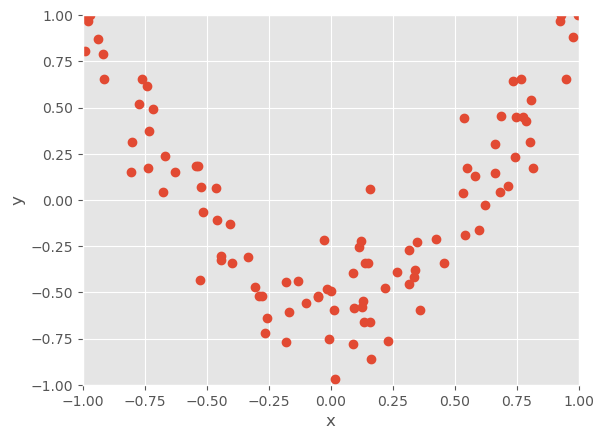

In [5]:
plt.plot(train_X.reshape(-1), train_y, 'o')
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(-1, 1); plt.ylim(-1, 1);

Quan sát dữ liệu trên hình vẽ ta thấy dường như $\textbf{x}$ và $y$ có mối quan hệ phi tuyến với nhau. Tuy nhiên, để đơn giản, trước mắt ta vẫn sẽ dùng mô hình Linear Regression cho dữ liệu này. Sau đó ta sẽ tìm cách cải tiến. 

## Tiền xử lý dữ liệu quan sát được

Để có thể tính ra bộ trọng số của mô hình Linear Regression (theo công thức ở trang 13 ở slide lý thuyết "lect03...") thì trước tiên ta cần thêm một cột với các giá trị đều bằng 1 vào đầu mảng `train_X`. Mảng `train_X` sau khi được thêm cột 1 chính là ma trận $\textbf{X}$ trong slide lý thuyết, và ta sẽ sẵn sàng để tính ra bộ trọng số của Linear Regression.

Nhiệm vụ của bạn (2đ):

- Viết hàm `add_ones`. Hàm này có tham số đầu vào là mảng `X` có shape là `(N, d)` với `N` là số lượng véc-tơ đầu vào và `d` là số lượng phần tử của mỗi véc-tơ đầu vào. Hàm này sẽ trả về mảng `X` sau khi đã được thêm cột 1 ở đầu và mảng này có shape là `(N, d+1)`.
- Gọi hàm `add_ones` với tham số đầu vào là `train_X` và lưu kết quả vào biến `train_Z`.

In [6]:
def add_ones(X):
    # YOUR CODE HERE
    ones_column = np.ones((X.shape[0], 1))
    X = np.concatenate((ones_column, X), axis=1)
    return X

# Gọi hàm add_ones để tiền xử lý train_X
# YOUR CODE HERE
train_Z = add_ones(train_X)

In [7]:
# TEST
assert train_Z.shape == (100, 2)
assert str(train_Z[0][0].round(4)) == '1.0'
assert str(train_Z[0][1].round(4)) == '-0.5348'
assert str(train_Z[1][0].round(4)) == '1.0'
assert str(train_Z[1][1].round(4)) == '0.5954'
assert str(train_Z[2][0].round(4)) == '1.0'
assert str(train_Z[2][1].round(4)) == '0.7462'

## Tìm mô hình Linear Regression từ dữ liệu quan sát được

Sau khi đã có được mảng `train_Z` (là `train_X` đã được thêm cột 1) thì ta có thể dễ dàng tìm được bộ trọng số của Linear Regression (theo công thức ở trang 13 ở slide lý thuyết "lect03...").

Nhiệm vụ của bạn (2đ):

- Viết hàm `train_linreg`. Hàm này có tham số đầu vào là mảng `X` và mảng `y`. Mảng `X` chứa các véc-tơ đầu vào của dữ liệu quan sát được, mảng này đã được thêm cột 1 ở đầu, có shape là `(N, d+1)` với `N` là số lượng véc-tơ đầu vào của dữ liệu quan sát được và `d` là số lượng phần tử của mỗi véc-tơ đầu vào khi chưa thêm 1 ở đầu. Mảng `y` chứa các đầu ra tương ứng, có shape là `(N,`). Hàm này trả về mảng chứa các trọng số của mô hình Linear Regression tìm được, có shape là `(d+1,)`. \
Theo công thức ở trang 13 của slide lý thuyết "lect03..." thì ta sẽ cần tính nghịch đảo của `X` chuyển vị nhân `X`. Trong đa số trường hợp thì `X` chuyển vị nhân `X` sẽ khả nghịch, nhưng đôi khi xui quá cũng có thể xảy ra trường hợp không khả nghịch. Để chắc ăn, bạn hãy dùng hàm `np.linalg.pinv` (thay vì `np.linalg.inv`) để tích nghịch đảo; trong trường hợp không khả nghịch, hàm này vẫn sẽ tính ra cho bạn một kết quả xấp xỉ.  
- Gọi hàm `train_linreg` với tham số đầu vào là `train_Z` và `train_y`, lưu bộ trọng số tìm được vào biến `w`.

In [8]:
def train_linreg(X, y):
    # YOUR CODE HERE
    w = np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)
    return w

# Gọi hàm train_linreg để tìm bộ trọng số của Linear Regression từ train_Z và train_y
# YOUR CODE HERE
w = train_linreg(train_Z, train_y)

In [9]:
# TEST
assert w.shape == (2,)
assert str(w[0].round(4)) == '-0.0084'
assert str(w[1].round(4)) == '-0.081'

## Dùng mô hình Linear Regression tìm được để dự đoán với dữ liệu quan sát được và đánh giá kết quả

Sau khi tìm được bộ trọng số của Linear Regression thì ta sẽ thử dùng bộ trọng số này để dự đoán với các véc-tơ đầu vào của dữ liệu quan sát được và so sánh với các đầu ra đúng để xem sai lệch là bao nhiêu.

Nhiệm vụ 1 của bạn (2đ):

- Viết hàm `compute_linreg_output`. Hàm này có tham số đầu vào là mảng `w` và mảng `X`. Mảng `w` chứa bộ trọng số của Linear Regresssion, có shape là `(d+1,)` với `d` là số lượng phần tử của véc-tơ đầu vào khi chưa thêm 1 ở đầu. Mảng `X` chứa các véc-tơ đầu vào cần dự đoán, mảng này đã được thêm cột 1 ở đầu, có shape là `(N, d+1)` với `N` là số lượng véc-tơ đầu vào.
- Gọi hàm `compute_linreg_output` với tham số đầu vào là mảng `w` và mảng `train_Z`, lưu kết quả vào biến `predicted_train_y`.

In [10]:
def compute_linreg_output(w, X):
    # YOUR CODE HERE
    y_hat = X.dot(w)
    return y_hat

# Gọi hàm compute_linreg_output để dự đoán với train_Z
# YOUR CODE HERE
predicted_train_y = compute_linreg_output(w, train_Z)

In [11]:
# TEST
assert predicted_train_y.shape == (100,)
assert str(predicted_train_y[0].round(4)) == '0.0349'
assert str(predicted_train_y[1].round(4)) == '-0.0566'
assert str(predicted_train_y[2].round(4)) == '-0.0688'

Nhiệm vụ 2 của bạn (2đ):

- Viết hàm `compute_mae`. Hàm này có tham số đầu vào là mảng `predicted_y` và mảng `y`. Mảng `predicted_y` chứa các đầu ra dự đoán, có shape là `(N,)`. Mảng `y` chứa các đầu ra đúng, cũng có shape là `(N,)`. Hàm này trả về một số thực cho biết độ lỗi MAE (Mean Absolute Error) giữa 2 mảng `predicted_y` và `y`. Công thức tính MAE thì tương tự như MSE (Mean Square Error) nhưng thay bình phương bằng trị tuyệt đối. Ở đây, ta dùng MAE vì MAE dễ cảm nhận hơn so với MSE.
- Gọi hàm `compute_mae` với tham số đầu vào là mảng `predicted_train_y` và `train_y`, lưu kết quả vào biến `train_mae`.

In [12]:
def compute_mae(predicted_y, y):
    # YOUR CODE HERE
    mae = np.mean(np.abs(predicted_y - y))
    return mae

# Gọi hàm compute_mae để tính độ lỗi giữa predicted_train_y và train_y
# YOUR CODE HERE
train_mae = compute_mae(predicted_train_y, train_y)

In [13]:
# TEST
assert str(np.round(train_mae, 4)) == '0.4579'

Hmm .... Với `train_y` có miền giá trị từ xấp xỉ -1 đến xấp xỉ 1 thì có thể nói độ lỗi `train_mae` này là lớn.

Trong trường hợp dữ liệu đơn giản của ta (véc-tơ đầu vào chỉ có một chiều), một cách khác để đánh giá mô hình Linear Regression tìm được là trực quan hóa.

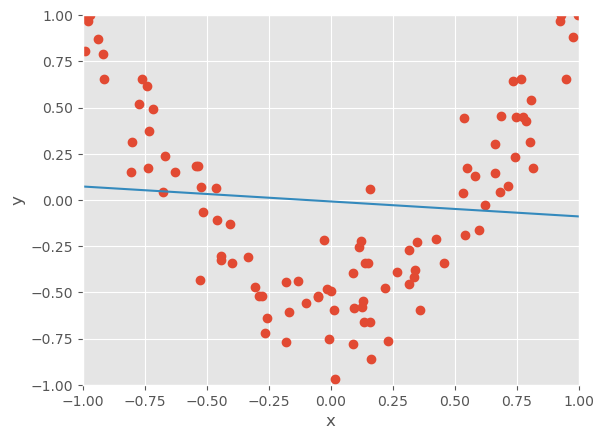

In [14]:
plt.plot(train_X.reshape(-1), train_y, 'o')
plt.xlabel('x'); plt.ylabel('y')
plt.xlim(-1, 1); plt.ylim(-1, 1)

xx = np.array([-1, 1])
yy = w[0] + w[1] * xx
plt.plot(xx, yy, '-');

Hmm ...

Như vậy, ta thấy mô hình Linear Regression tìm được không khớp tốt vào dữ liệu quan sát được và điều này được thể hiện bởi độ lỗi MAE lớn trên dữ liệu quan sát được. Nhưng cái ta quan tâm sau cùng là độ lỗi của mô hình Linear Regression tìm được trên dữ liệu mới ngoài dữ liệu quan sát được. Biết đâu ... Ở phần kế, ta sẽ xem thử vận may của ta thế nào ;-).

## Tiền xử lý dữ liệu mới, dùng mô hình Linear Regression tìm được để dự đoán với dữ liệu mới và đánh giá kết quả

In [15]:
new_Z = add_ones(new_X)
predicted_new_y = compute_linreg_output(w, new_Z)
new_mae = compute_mae(predicted_new_y, new_y)
assert str(np.round(new_mae, 4)) == '0.4299'

Hmm ... Độ lỗi `new_mae` mặc dù khá hơn một chút xíu so với `train_mae` (do ăn may) nhưng `new_mae` vẫn lớn. Nếu muốn `new_mae` nhỏ thì ta phải suy nghĩ cách cải tiến, chứ không thể dựa vào ăn may.

## Đưa ra ý tưởng cải tiến

Ưu điểm của mô hình Linear Regression là đơn giản, huấn luyện nhanh. Nhưng đơn giản cũng là nhược điểm của mô hình Linear Regression. Ta thấy dữ liệu quan sát được của ta thể hiện mối quan hệ phi tuyến giữa véc-tơ đầu vào $\textbf{x}$ và đầu ra $y$. Mô hình Linear Regression là mô hình tuyến tính nên sẽ không thể khớp tốt vào dữ liệu quan sát được này, dẫn tới độ lỗi lớn trên dữ liệu quan sát được. Nếu trên dữ liệu quan sát được mà có độ lỗi lớn thì trên dữ liệu mới thường cũng sẽ có độ lỗi lớn.

Nếu ta có thể cải thiện độ lỗi của mô hình Linear Regression trên dữ liệu quan sát được thì độ lỗi trên dữ liệu mới có khả năng sẽ được cải thiện theo. Một cách để cải thiện độ lỗi của mô hình Linear Regression trên dữ liệu quan sát được là ta sẽ suy nghĩ để thiết kế ra véc-tơ đầu vào $\textbf{z}$ thay cho véc-tơ đầu vào $\textbf{x}$ sao cho $\textbf{z}$ sẽ có mối quan hệ tuyến tính (hoặc xấp xỉ tuyến tính) với $y$ trên dữ liệu quan sát được; sau đó thì ta có thể áp dụng Linear Regression một cách bình thường nhưng thay $\textbf{x}$ bằng $\textbf{z}$. Với dữ liệu quan sát được của ta, có thể thấy là dùng một đường cong bậc 2 thì sẽ khớp khá tốt. Do đó, ta có thể thiết kế véc-tơ đầu vào $\textbf{z}$ là véc-tơ đầu vào $\textbf{x}$ ($\textbf{x}$ chỉ có một phần tử là $x_{1}$) được bổ sung thêm một phần tử nữa là $x_{1}^{2}$.

## Tiền xử lý dữ liệu quan sát được

Từ mảng `train_X`, ta sẽ tạo ra mảng `train_Z` bằng cách: thêm cột bình phương vào cuối `train_X`, rồi thêm cột 1 vào đầu `train_X`.

Nhiệm vụ của bạn (2đ):

- Viết hàm `add_squares`. Hàm này có tham số đầu vào là mảng `X`, mảng này chưa thêm cột 1 ở đầu, có shape là `(N, d)` với `N` là số lượng véc-tơ đầu vào và `d` là số lượng phần tử của mỗi véc-tơ đầu vào. Ở đây, bạn được phép giả định là `d=1` (`X` chỉ có duy nhất một cột). Hàm này sẽ trả về mảng `X` sau khi đã được thêm cột bình phương (lấy cột duy nhất của `X` và bình phương lên) vào cuối mảng, và mảng này có shape là `(N, d+1)`.
- Gọi hàm `add_squares` với tham số đầu vào là `train_X`, rồi gọi tiếp hàm `add_ones` với tham số đầu vào là kết quả sau khi gọi hàm `add_squares`. Lưu kết quả sau cùng vào biến `train_Z`.

In [16]:
def add_squares(X):
    # YOUR CODE HERE
    X = np.concatenate((X, X**2), axis=1)
    return X

# Gọi hàm add_squares rồi add_ones để tiền xử lý train_X
# YOUR CODE HERE
train_Z = add_ones(add_squares(train_X))

In [17]:
# TEST
assert train_Z.shape == (100, 3)
assert str(train_Z[0][0].round(4)) == '1.0'
assert str(train_Z[0][1].round(4)) == '-0.5348'
assert str(train_Z[0][2].round(4)) == '0.286'
assert str(train_Z[1][0].round(4)) == '1.0'
assert str(train_Z[1][1].round(4)) == '0.5954'
assert str(train_Z[1][2].round(4)) == '0.3545'
assert str(train_Z[2][0].round(4)) == '1.0'
assert str(train_Z[2][1].round(4)) == '0.7462'
assert str(train_Z[2][2].round(4)) == '0.5568'

## Tìm mô hình Linear Regression từ dữ liệu quan sát được

In [18]:
w = train_linreg(train_Z, train_y)

## Dùng mô hình Linear Regression tìm được để dự đoán với dữ liệu quan sát được và đánh giá kết quả

In [19]:
predicted_train_y = compute_linreg_output(w, train_Z)
train_mae = compute_mae(predicted_train_y, train_y)
assert str(np.round(train_mae, 4)) == '0.1483'

Woohoo!

Khoan khoan, cái ta quan tâm là độ lỗi trên dữ liệu mới ngoài dữ liệu quan sát được.

## Tiền xử lý dữ liệu mới, dùng mô hình Linear Regression tìm được để dự đoán với dữ liệu mới và đánh giá kết quả

In [20]:
new_Z = add_ones(add_squares(new_X))
predicted_new_y = compute_linreg_output(w, new_Z)
new_mae = compute_mae(predicted_new_y, new_y)
assert str(np.round(new_mae, 4)) == '0.1564'

Woohoo!

Như vậy là độ lỗi MAE trên cả dữ liệu quan sát được lẫn dữ liệu mới đều giảm xuống một cách đáng kể. Happy ending :-).